## WEB SCRAPING

Web scraping is the process of using a computer program to gather information from the  internet. The modules needed for web scraping are:
1. requests: downloads files  and  web pages from the internet.
2. bs4 (BeautifulSoup): parses HTML

## THE REQUESTS MODULE
The requests module allows us to send HTTP requests using python. To download a file or a web page, we use the get() method of the requests module. This module returns a response object with which we can access a lot of information (such as status code, content) about the results of our GET request.

In [23]:
import requests
page = requests.get('https://www.jumia.com.ng/mobile-phones/apple/')
print(type(page))
#page

<class 'requests.models.Response'>


## STATUS CODES
A status code informs you of the status of the request. For example, a status code of 200 OK tells you that your request was successful whereas a status  code of 404 NOT FOUND tells you that the page was not found. To access the status  code of the response object, we us the *status_code* attribute.

In [24]:
page.status_code

200

In [3]:
page.raise_for_status()

## PAYLOAD

A response object has some valuable information known as a payload in the message body. We can access the payload of a response object in different formats using the response object attributes. Commonly used attributes for accessing the payload are *content and text*.
The content attribute returns bytes while the text attribute returns a string.

In [25]:
#https://ng.jumia.is/unsafe/fit-in/300x300/filters:fill(white)/product/19/6109852/1.jpg?1489

In [5]:
print(page.content)

b'<!DOCTYPE html><html lang="en" dir="ltr"><head><meta charset="utf-8"/><title>Apple iPhones | Buy iPhones Online | Jumia Nigeria</title><meta property="og:type" content="product"/><meta property="og:site_name" content="Jumia Nigeria"/><meta property="og:title" content="Apple iPhones | Buy iPhones Online | Jumia Nigeria"/><meta property="og:description" content="Buy Apple iPhones online at Jumia Nigeria | Large selection of iPhones at best prices - iPhone 13, 13 pro max, iphone 12, iphone X, &amp; more | Order now!"/><meta property="og:url" content="/mobile-phones/apple/"/><meta property="og:image" content="https://ng.jumia.is/cms/jumialogonew.png"/><meta property="og:locale" content="en_NG"/><meta name="title" content="Apple iPhones | Buy iPhones Online | Jumia Nigeria"/><meta name="robots" content="index,follow"/><meta name="description" content="Buy Apple iPhones online at Jumia Nigeria | Large selection of iPhones at best prices - iPhone 13, 13 pro max, iphone 12, iphone X, &amp; m

In [26]:
print(page.text)

<!DOCTYPE html><html lang="en" dir="ltr"><head><meta charset="utf-8"/><title>Apple iPhones | Buy iPhones Online | Jumia Nigeria</title><meta property="og:type" content="product"/><meta property="og:site_name" content="Jumia Nigeria"/><meta property="og:title" content="Apple iPhones | Buy iPhones Online | Jumia Nigeria"/><meta property="og:description" content="Buy Apple iPhones online at Jumia Nigeria | Large selection of iPhones at best prices - iPhone 13, 13 pro max, iphone 12, iphone X, &amp; more | Order now!"/><meta property="og:url" content="/mobile-phones/apple/"/><meta property="og:image" content="https://ng.jumia.is/cms/jumialogonew.png"/><meta property="og:locale" content="en_NG"/><meta name="title" content="Apple iPhones | Buy iPhones Online | Jumia Nigeria"/><meta name="robots" content="index,follow"/><meta name="description" content="Buy Apple iPhones online at Jumia Nigeria | Large selection of iPhones at best prices - iPhone 13, 13 pro max, iphone 12, iphone X, &amp; mor

## INSPECTING A WEB PAGE
Web pages are written in HTML and consists of HTML files. HTML stands for Hyper Text MarkUp Languageand an HTML file is a plain text file with .html extension. An html file contains tags while tells browser how to format the web page. HTML tags have a starting `<>` and closing tag `</>`.

We can use the web developer's tool to inspect any web page. This helps us to understand the structure of the web page we want to scrape.To access  the web developer tool, click on the three dots on the top right corner of your browser, select more tools and then, developer tools. Below is an image of the web developer's tool. 

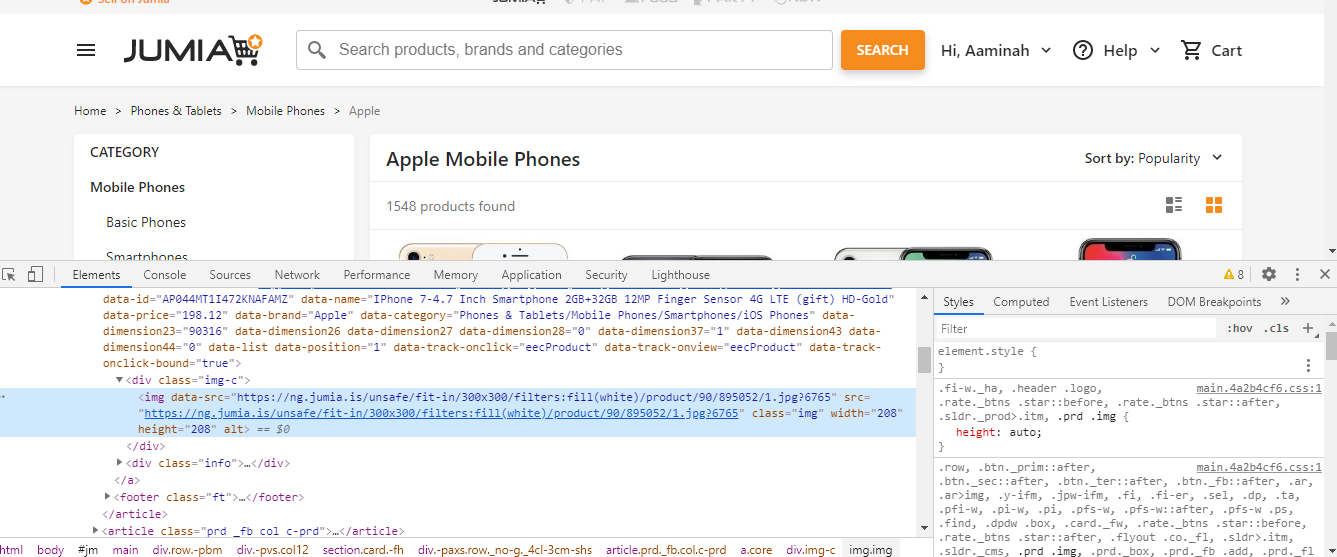

Once we have the web developer's tool opened, we can locate the html tags of any part of a webpage by moving our cursor over the part we are interested in on the web page.

## THE BEAUTIFUL SOUP MODULE
This module allows us to interact with a web page like we do using the web developer's tool. It allows us to extract information from a web page. To create a beautiful soup object, we must pass to the beautiful function() two arguments. The first argument is a string containing the html that it will parse or an html file and the second argument is the parser to use analyse the HTML. 

In [7]:
import urllib.request as urllib2
from bs4 import BeautifulSoup


In [27]:
response  = urllib2.urlopen('https://en.wikipedia.org/wiki/Natural_language_processing')

In [11]:
html_doc = response.read()

In [28]:
#parsing

soup = BeautifulSoup(html_doc, 'html.parser')

In [29]:
# formatting the parsed html
strhtm=soup.prettify()

In [30]:
#print few lines
print (strhtm[:1000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-appearance-disabled vector-feature-appearance-pinned-clientpref-0 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Natural language processing - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu

In [16]:
print(soup.title)

<title>Natural language processing - Wikipedia</title>


In [31]:
print(soup.head
      )

<head>
<meta charset="utf-8"/>
<title>Natural language processing - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-appearance-disabled vector-feature-appearance-pinned-clientpref-0 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available";var cookie=document.cookie.match(/(?:^|; )enwikimwclientpreferences=([^;]+)/);if(cookie){cookie[1].split('%2C').forEach(function(pref){className=className.replace(new RegExp('(^| )'+pref.replace(/-clientpref-\w+$|[^\w-]+/g,'')+'-clientpref-\\w+( |$)'),'$1'+pref+'$2');});}document.documentElement.className=className;}

In [18]:
# extract all instances in a tag
for x in soup.find_all('a'):
    print(x.string)

Jump to content
Main page
Contents
Current events
Random article
About Wikipedia
Contact us
Donate
Help
Learn to edit
Community portal
Recent changes
Upload file
None
None
Create account
Log in
None
None
learn more
Contributions
Talk
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
Afrikaans
العربية
Արեւմտահայերէն
Azərbaycanca
বাংলা
閩南語 / Bân-lâm-gú
Беларуская
Беларуская (тарашкевіца)
Български
Bosanski
Brezhoneg
Català
Čeština
Cymraeg
Dansk
Deutsch
Eesti
Ελληνικά
Español
Esperanto
Euskara
فارسی
Français
Gaeilge
Galego
한국어
Հայերեն
हिन्दी
Hrvatski
Bahasa Indonesia
IsiZulu
Íslenska
Italiano
עברית
ಕನ್ನಡ
ქართული
Latviešu
Lietuvių
Македонски
मराठी
مصرى
Монгол
မြန်မာဘာသာ
日本語
ଓଡ଼ିଆ
پښتو
Picard
Piemontèis
Polski
Português
Română
Runa Simi
Русский
Shqip
Simple English
کوردی
Српски / srpski
Srpskohrvatski / српскохрватски
Suomi
தமிழ்
తెలుగు
ไทย
Türkçe
Українська
Tiếng Việt
粵語
中文
Edit links
Article
Talk
Read
Edit
View history
Read
Edit


In [35]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.text, 'html.parser')
type(soup)

bs4.BeautifulSoup

We can also use the faster `lxml` parser instead of the html parser. With a beautiful soup object, we can use its methods to locate specific part of an HTML file. 

In [36]:
#soup = BeautifulSoup(page.text, 'lxml')

#print(soup)

FeatureNotFound: Couldn't find a tree builder with the features you requested: lxml. Do you need to install a parser library?

To print the beautiful soup object with the tags properly nested, we use the prettify method. 

In [37]:
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Apple iPhones | Buy iPhones Online | Jumia Nigeria
  </title>
  <meta content="product" property="og:type"/>
  <meta content="Jumia Nigeria" property="og:site_name"/>
  <meta content="Apple iPhones | Buy iPhones Online | Jumia Nigeria" property="og:title"/>
  <meta content="Buy Apple iPhones online at Jumia Nigeria | Large selection of iPhones at best prices - iPhone 13, 13 pro max, iphone 12, iphone X, &amp; more | Order now!" property="og:description"/>
  <meta content="/mobile-phones/apple/" property="og:url"/>
  <meta content="https://ng.jumia.is/cms/jumialogonew.png" property="og:image"/>
  <meta content="en_NG" property="og:locale"/>
  <meta content="Apple iPhones | Buy iPhones Online | Jumia Nigeria" name="title"/>
  <meta content="index,follow" name="robots"/>
  <meta content="Buy Apple iPhones online at Jumia Nigeria | Large selection of iPhones at best prices - iPhone 13, 13 pro max, iph

## FINDING ELEMENTS IN AN HTML DOCUMENT
We can access the elements of an html document using various methods such as select, find and find_all. The select and find_all methods return a list of tags while the find method returns a single tag, the first match. The syntax of the select method is different from that of the find and find_all methods.  
To find an element by id, we can write any of the codes below. The select method uses the `#` symbol to indicate an id and the `.` to indicate a class.

In [5]:
print(soup.find(id = 'jm').prettify())

<div id="jm">
 <div class="banner" data-bnrid="57" data-end="2023-12-31T23:59:00+01:00" style="background:#FF9900;">
  <div class="row _no-go -phs">
   <a class="col16 ar _1168-56" data-creative="https://ng.jumia.is/cms/0-5-brand-festival/2023/Brand-days/Tecno/Tecno_top-strip_Desktop.gif" data-id="catalog_category_Desktop Top Strip DTS_JBF23_ADS_TCN" data-name="Desktop Top Strip DTS_JBF23_ADS_TCN" data-position="banner_top" data-track-onclick="eecPromo" data-track-onview="eecPromo" href="https://www.jumia.com.ng/mlp-tecno-store/">
    <img alt="Desktop Top Strip DTS_JBF23_ADS_TCN" class="_ni" data-lazy="true" data-src="https://ng.jumia.is/cms/0-5-brand-festival/2023/Brand-days/Tecno/Tecno_top-strip_Desktop.gif" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7"/>
   </a>
  </div>
 </div>
 <div class="vb row -i-ctr -j-ctr _head -bg-gy05">
  <div class="col3 -df -j-start">
   <a class="_link -df -i-ctr -or5 -m -fs12" href="/marketplace-vendor/" rel="noop

In [38]:
soup.select('#jm')

[<div id="jm"><div class="banner" data-bnrid="57" data-end="2026-12-31T23:59:00+01:00" style="background:#20AC76;"><div class="row _no-go -phs"><a class="col16 ar _1168-56" data-creative="https://ng.jumia.is/cms/0-2-Shopping-Festival/2024/Brand-days/Nexus/TW-brands-top-strip_NIVEA.gif" data-id="catalog_category_DS_CP_JSF_ADS_NXS_HP" data-name="DS_CP_JSF_ADS_NXS_HP" data-position="banner_top" data-track-onclick="eecPromo" data-track-onview="eecPromo" href="https://www.jumia.com.ng/mlp-nexus-store/"><img alt="DS_CP_JSF_ADS_NXS_HP" class="_ni" data-lazy="true" data-src="https://ng.jumia.is/cms/0-2-Shopping-Festival/2024/Brand-days/Nexus/TW-brands-top-strip_NIVEA.gif" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7"/></a></div></div><div class="vb row -i-ctr -j-ctr _head -bg-gy05"><div class="col3 -df -j-start"><a class="_link -df -i-ctr -or5 -m -fs12" href="/marketplace-vendor/" rel="noopener" target="_blank"><svg class="ic -f-or5 -maxs" height="16" vie

Passing the name of the tag as an argument to the select, find and find_all methods will return the specified tag element(s). We can also retrieve a tag element by using the .tag_name attribute. Suppose we want to select div element(s) in the web page, we can do any of the following.

In [39]:
soup.div #This will return the first match

<div id="jm"><div class="banner" data-bnrid="57" data-end="2026-12-31T23:59:00+01:00" style="background:#20AC76;"><div class="row _no-go -phs"><a class="col16 ar _1168-56" data-creative="https://ng.jumia.is/cms/0-2-Shopping-Festival/2024/Brand-days/Nexus/TW-brands-top-strip_NIVEA.gif" data-id="catalog_category_DS_CP_JSF_ADS_NXS_HP" data-name="DS_CP_JSF_ADS_NXS_HP" data-position="banner_top" data-track-onclick="eecPromo" data-track-onview="eecPromo" href="https://www.jumia.com.ng/mlp-nexus-store/"><img alt="DS_CP_JSF_ADS_NXS_HP" class="_ni" data-lazy="true" data-src="https://ng.jumia.is/cms/0-2-Shopping-Festival/2024/Brand-days/Nexus/TW-brands-top-strip_NIVEA.gif" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7"/></a></div></div><div class="vb row -i-ctr -j-ctr _head -bg-gy05"><div class="col3 -df -j-start"><a class="_link -df -i-ctr -or5 -m -fs12" href="/marketplace-vendor/" rel="noopener" target="_blank"><svg class="ic -f-or5 -maxs" height="16" view

In [8]:
soup.find('div')

<div id="jm"><div class="banner" data-bnrid="57" data-end="2023-12-31T23:59:00+01:00" style="background:#FF9900;"><div class="row _no-go -phs"><a class="col16 ar _1168-56" data-creative="https://ng.jumia.is/cms/0-5-brand-festival/2023/Brand-days/Tecno/Tecno_top-strip_Desktop.gif" data-id="catalog_category_Desktop Top Strip DTS_JBF23_ADS_TCN" data-name="Desktop Top Strip DTS_JBF23_ADS_TCN" data-position="banner_top" data-track-onclick="eecPromo" data-track-onview="eecPromo" href="https://www.jumia.com.ng/mlp-tecno-store/"><img alt="Desktop Top Strip DTS_JBF23_ADS_TCN" class="_ni" data-lazy="true" data-src="https://ng.jumia.is/cms/0-5-brand-festival/2023/Brand-days/Tecno/Tecno_top-strip_Desktop.gif" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7"/></a></div></div><div class="vb row -i-ctr -j-ctr _head -bg-gy05"><div class="col3 -df -j-start"><a class="_link -df -i-ctr -or5 -m -fs12" href="/marketplace-vendor/" rel="noopener" target="_blank"><svg class

In [40]:
soup.select('div')

[<div id="jm"><div class="banner" data-bnrid="57" data-end="2026-12-31T23:59:00+01:00" style="background:#20AC76;"><div class="row _no-go -phs"><a class="col16 ar _1168-56" data-creative="https://ng.jumia.is/cms/0-2-Shopping-Festival/2024/Brand-days/Nexus/TW-brands-top-strip_NIVEA.gif" data-id="catalog_category_DS_CP_JSF_ADS_NXS_HP" data-name="DS_CP_JSF_ADS_NXS_HP" data-position="banner_top" data-track-onclick="eecPromo" data-track-onview="eecPromo" href="https://www.jumia.com.ng/mlp-nexus-store/"><img alt="DS_CP_JSF_ADS_NXS_HP" class="_ni" data-lazy="true" data-src="https://ng.jumia.is/cms/0-2-Shopping-Festival/2024/Brand-days/Nexus/TW-brands-top-strip_NIVEA.gif" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7"/></a></div></div><div class="vb row -i-ctr -j-ctr _head -bg-gy05"><div class="col3 -df -j-start"><a class="_link -df -i-ctr -or5 -m -fs12" href="/marketplace-vendor/" rel="noopener" target="_blank"><svg class="ic -f-or5 -maxs" height="16" vie

In [10]:
soup.find_all('div')

283

In [45]:
soup.find_all('div', class_ = 'info')

[<div class="info"><h3 class="name">Apple IPhone 15 Pro Max 512gb - Nano Sim - Natural Titanium</h3><div class="prc">₦ 2,250,000</div><div class="s-prc-w"><div class="old">₦ 3,300,000</div><div class="bdg _dsct _sm">32%</div></div><div class="rev"><div class="stars _s">5 out of 5<div class="in" style="width:100%"></div></div>(1)</div></div>,
 <div class="info"><h3 class="name">Apple IPhone 15 Pro Max 512gb - Nano Sim - Blue Titanium</h3><div class="prc">₦ 2,250,000</div><div class="s-prc-w"><div class="old">₦ 3,300,000</div><div class="bdg _dsct _sm">32%</div></div></div>,
 <div class="info"><h3 class="name">Apple IPhone 13 Pro Max 6.7" Super Retina XDR Display With ProMotion, (6GB RAM + 512GB ROM), IOS 15, 5G, FaceTime - Gold</h3><div class="prc">₦ 1,700,000</div><div class="rev"><div class="stars _s">5 out of 5<div class="in" style="width:100%"></div></div>(1)</div></div>,
 <div class="info"><h3 class="name">Apple IPhone 15 Pro Max 256gb - Nano Sim - Blue Titanium</h3><div class="prc

At times we do not want to retrieve all element tags but tags that belong to a specific class. We can do this by specifying the class parameter of the find/find_all method or by using the `.` symbol with the select method. Suppose we want to retrieve all article tags that belong to the class `prd`. 

In [46]:
soup.select('article.prd._fb.col.c-prd')

[<article class="prd _fb col c-prd"><a class="btn _i _rnd -mas -fsh0 -me-start _wslt _sec" data-pop-open="addToWishlist" data-pop-trig="atw" data-simplesku="AP044MP3SD3N6NAFAMZ-401390922" data-sku="AP044MP3SD3N6NAFAMZ" data-track-onclick="wishlist" href="/customer/account/login/?tkWl=AP044MP3SD3N6NAFAMZ-401390922&amp;return=%2Fmobile-phones%2Fapple%2F" rel="nofollow"><svg aria-label="Add to wishlist" class="ic -f-or5" height="16" viewbox="0 0 24 24" width="16"><use xlink:href="https://www.jumia.com.ng/assets_he/images/i-icons.995b8ca3.svg#saved-items"></use></svg></a><a class="core" data-ga4-discount="691.33" data-ga4-index="1" data-ga4-item_brand="Apple" data-ga4-item_category="Phones &amp; Tablets" data-ga4-item_category2="Mobile Phones" data-ga4-item_category3="Smartphones" data-ga4-item_category4="iOS Phones" data-ga4-item_id="AP044MP3SD3N6NAFAMZ" data-ga4-item_name="IPhone 15 Pro Max 512gb - Nano Sim - Natural Titanium" data-ga4-list="" data-ga4-price="1481.42" data-gtm-brand="App

In [47]:
soup.find_all('article', class_='prd _fb col c-prd')

[<article class="prd _fb col c-prd"><a class="btn _i _rnd -mas -fsh0 -me-start _wslt _sec" data-pop-open="addToWishlist" data-pop-trig="atw" data-simplesku="AP044MP3SD3N6NAFAMZ-401390922" data-sku="AP044MP3SD3N6NAFAMZ" data-track-onclick="wishlist" href="/customer/account/login/?tkWl=AP044MP3SD3N6NAFAMZ-401390922&amp;return=%2Fmobile-phones%2Fapple%2F" rel="nofollow"><svg aria-label="Add to wishlist" class="ic -f-or5" height="16" viewbox="0 0 24 24" width="16"><use xlink:href="https://www.jumia.com.ng/assets_he/images/i-icons.995b8ca3.svg#saved-items"></use></svg></a><a class="core" data-ga4-discount="691.33" data-ga4-index="1" data-ga4-item_brand="Apple" data-ga4-item_category="Phones &amp; Tablets" data-ga4-item_category2="Mobile Phones" data-ga4-item_category3="Smartphones" data-ga4-item_category4="iOS Phones" data-ga4-item_id="AP044MP3SD3N6NAFAMZ" data-ga4-item_name="IPhone 15 Pro Max 512gb - Nano Sim - Natural Titanium" data-ga4-list="" data-ga4-price="1481.42" data-gtm-brand="App

Passing the class values as a list will return all elements that have any of the specified value as a class.

In [43]:
soup.find_all('article', class_=['prd', '_fb', 'col', 'c-prd'])

[<article class="prd _fb col c-prd"><a class="btn _i _rnd -mas -fsh0 -me-start _wslt _sec" data-pop-open="addToWishlist" data-pop-trig="atw" data-simplesku="AP044MP3SD3N6NAFAMZ-401390922" data-sku="AP044MP3SD3N6NAFAMZ" data-track-onclick="wishlist" href="/customer/account/login/?tkWl=AP044MP3SD3N6NAFAMZ-401390922&amp;return=%2Fmobile-phones%2Fapple%2F" rel="nofollow"><svg aria-label="Add to wishlist" class="ic -f-or5" height="16" viewbox="0 0 24 24" width="16"><use xlink:href="https://www.jumia.com.ng/assets_he/images/i-icons.995b8ca3.svg#saved-items"></use></svg></a><a class="core" data-ga4-discount="691.33" data-ga4-index="1" data-ga4-item_brand="Apple" data-ga4-item_category="Phones &amp; Tablets" data-ga4-item_category2="Mobile Phones" data-ga4-item_category3="Smartphones" data-ga4-item_category4="iOS Phones" data-ga4-item_id="AP044MP3SD3N6NAFAMZ" data-ga4-item_name="IPhone 15 Pro Max 512gb - Nano Sim - Natural Titanium" data-ga4-list="" data-ga4-price="1481.42" data-gtm-brand="App

We can get various information from an element tag using the attributes of a tag and also by using the attributes of a beautiful soup object 

In [48]:
articles = soup.find_all('article', class_='prd _fb col c-prd')
articles
print(articles[0].prettify())

<article class="prd _fb col c-prd">
 <a class="btn _i _rnd -mas -fsh0 -me-start _wslt _sec" data-pop-open="addToWishlist" data-pop-trig="atw" data-simplesku="AP044MP3SD3N6NAFAMZ-401390922" data-sku="AP044MP3SD3N6NAFAMZ" data-track-onclick="wishlist" href="/customer/account/login/?tkWl=AP044MP3SD3N6NAFAMZ-401390922&amp;return=%2Fmobile-phones%2Fapple%2F" rel="nofollow">
  <svg aria-label="Add to wishlist" class="ic -f-or5" height="16" viewbox="0 0 24 24" width="16">
   <use xlink:href="https://www.jumia.com.ng/assets_he/images/i-icons.995b8ca3.svg#saved-items">
   </use>
  </svg>
 </a>
 <a class="core" data-ga4-discount="691.33" data-ga4-index="1" data-ga4-item_brand="Apple" data-ga4-item_category="Phones &amp; Tablets" data-ga4-item_category2="Mobile Phones" data-ga4-item_category3="Smartphones" data-ga4-item_category4="iOS Phones" data-ga4-item_id="AP044MP3SD3N6NAFAMZ" data-ga4-item_name="IPhone 15 Pro Max 512gb - Nano Sim - Natural Titanium" data-ga4-list="" data-ga4-price="1481.42" 

In [49]:
phone_name = articles[0].find('h3').text
print(phone_name)

Apple IPhone 15 Pro Max 512gb - Nano Sim - Natural Titanium


In [50]:
img_src = articles[0].img['data-src']
print(img_src)

https://ng.jumia.is/unsafe/fit-in/300x300/filters:fill(white)/product/29/0390262/1.jpg?0127


In [51]:
price = articles[0].find('div', class_='prc').text
print(price)

₦ 2,250,000


In [52]:
for article in articles:
        phone_name = article.find('h3', class_='name').text
        img_src = article.img['data-src']
        price = article.find('div', class_='prc').text
        print(f'Name: {phone_name}\nImage link: {img_src}\nPrice: {price}')

Name: Apple IPhone 15 Pro Max 512gb - Nano Sim - Natural Titanium
Image link: https://ng.jumia.is/unsafe/fit-in/300x300/filters:fill(white)/product/29/0390262/1.jpg?0127
Price: ₦ 2,250,000
Name: Apple IPhone 15 Pro Max 512gb - Nano Sim - Blue Titanium
Image link: https://ng.jumia.is/unsafe/fit-in/300x300/filters:fill(white)/product/58/0390262/1.jpg?9778
Price: ₦ 2,250,000
Name: Apple IPhone 13 Pro Max 6.7" Super Retina XDR Display With ProMotion, (6GB RAM + 512GB ROM), IOS 15, 5G, FaceTime - Gold
Image link: https://ng.jumia.is/unsafe/fit-in/300x300/filters:fill(white)/product/55/122749/1.jpg?5260
Price: ₦ 1,700,000
Name: Apple IPhone 15 Pro Max 256gb - Nano Sim - Blue Titanium
Image link: https://ng.jumia.is/unsafe/fit-in/300x300/filters:fill(white)/product/81/0390262/1.jpg?9046
Price: ₦ 2,150,000
Name: Apple IPhone 12 Pro Max - 6.7-Inch - 128GB ROM, 6GB RAM - 2815mAh
Image link: https://ng.jumia.is/unsafe/fit-in/300x300/filters:fill(white)/product/52/3501422/1.jpg?0218
Price: ₦ 780,0

To goal of web scraping is to get data from the internet. Most times, we want  save this data to a file for further processing. Let's see how we can do this.

In [62]:
# to save scraped info in a txt file
with open('phones.txt', 'w', encoding='utf-8') as f:
    #writing the header
    f.write('Phone Name, Image Source, Price\n')
    f.write('\n')

    #iterating through articles and writing the data
    for article in articles:
        phone_name = article.find('a', class_='core').get('data-ga4-item_name')
        img_src= article.find('img').get('data-src')
        price= article.find('div', class_='prc').text

        f.write(f'Name: {phone_name}\n')
        f.write(f'Image link: {img_src}\n')
        f.write (f'price:{price}\n')
        f.write('\n')
                

print("Data has been successfully saved to phones.txt")


Data has been successfully saved to phones.txt


In [63]:
# Saving scraped info in a csv file
import pandas as pd

# List to hold the scraped data
data=[]

#extracting data from each article
for article in articles:
    phone_name = article.find('a',class='core').get('data-ga4-item_name')
    img_src =article.find('img').get('data-src', 'No image source')
    price =article.find('div', class='prc').text.strip()

    #Append the ectracted data as a dictionary to the list
    data.append({
        'Phone Name': phone_name,
        'Image Source': img_src,
        'Price': price
    })

    # Create a DataFrame from the list of dictionaries
    df =pd.DataFrame(data)

    #Save the DataFrame to a CSV file
    df.to_csv('phones.csv', index=False, encoding='utf-8')

print("Data has been successfully saved to phones.csv")


SyntaxError: invalid syntax (1344046755.py, line 9)

In [53]:
with open('phones.txt', 'w', encoding ='utf-8') as f:
    f.write(f'phone name, image source, price')
    f.write('\n')
    for article in articles:
        phone_name = article.find('h3', class_='name').text
        img_src = article.img['data-src']
        price = article.find('div', class_='prc').text
        f.write(f'Name: {phone_name}\nImage link: {img_src}\nPrice: {price}')
        f.write('\n')
        

<div class="info"><h3 class="name">Apple Iphone Xs Max 64gb/4gb 6.5inch Silver, Case &amp; Screen Guide</h3><div class="prc">₦ 305,000</div></div>

In [54]:
phones_info = soup.find_all('div', class_ = 'info')
for phone in phones_info:
    phone_name = phone.find('h3').text
    print(phone_name)
    

Apple IPhone 15 Pro Max 512gb - Nano Sim - Natural Titanium
Apple IPhone 15 Pro Max 512gb - Nano Sim - Blue Titanium
Apple IPhone 13 Pro Max 6.7" Super Retina XDR Display With ProMotion, (6GB RAM + 512GB ROM), IOS 15, 5G, FaceTime - Gold
Apple IPhone 15 Pro Max 256gb - Nano Sim - Blue Titanium
Apple IPhone 12 Pro Max - 6.7-Inch - 128GB ROM, 6GB RAM - 2815mAh
Apple IPhone XR - 6.1" - 64GB ROM, 3GB RAM, 2942mAh - Blue
Apple IPhone 14 Pro Max 6.7" 256GB Nano Sim - Deep Purple
Apple IPhone 13 - 6.1" - 128GB ROM, 4GB RAM, 3240mAh - White
Apple IPhone 13 Pro Max 6.7" Super Retina XDR Display With ProMotion, (6GB RAM + 512GB ROM) IOS 15, 5G, FaceTime - Sierra Blue
Apple IPhone 11 Pro Max - 6.5" - 4GB RAM, 64GB ROM - Gold
Apple IPhone 15 Pro 128gb - Nano Sim - Natural Titanium
Apple IPhone 12 Pro Max - 6.7" - 256GB ROM, 6GB RAM - IOS 14.
Apple Iphone 12 Pro Max 256GB - Gold
Apple IPHONE 12 PRO MAX  6.7" (12PM+12PM+12PM) 128+6GB RAM 3687mAh
Apple IPhone 13 Pro 6.1 Inch (6GB RAM + 256GB ROM)- Bl

You can also save the scraped data as a csv file (comma seperated file).This is a very common file used in data science and machine learning. 

In [55]:
with open('phones.csv', 'w', encoding ='utf-8') as f:
    f.write(f'phone name, image source, price')
    f.write('\n')
    for article in articles:
        phone_name = article.find('h3', class_='name').text
        img_src = article.img['data-src']
        price = article.find('div', class_='prc').text
        f.write(f'{phone_name}, {img_src}, {price}')
        f.write('\n')

## SCRAPING DATA ACROSS MULTIPLE PAGES

To scrape across multiple pages, we need observe the website url and how it changes as we navigate across pages. You will notice that a part of the Url remains the same as we navigate while a part is constantly changing following a pattern. 

For example, the jumia webpage we are currently working on, the web url is `https://www.jumia.com.ng/mobile-phones/apple/` but as we click on next page, then the url changes to `https://www.jumia.com.ng/mobile-phones/apple/?page=2`. As we navigate through pages, the page number will always increase by 1. Also, it was observed that if we set page  = 1 in the url (`https://www.jumia.com.ng/mobile-phones/apple/?page=1`), it will return same page as `https://www.jumia.com.ng/mobile-phones/apple/`. With this info, we can scrape data across all the pages, we just need to know the last page number.

In [25]:
with open('Iphones.txt', 'w', encoding ='utf-8') as f:
    for index in range (1, 42):
        page = requests.get(f'https://www.jumia.com.ng/mobile-phones/apple/?page={index}')
        soup = BeautifulSoup(page.text, 'lxml')
        articles = soup.find_all('article', class_='prd _fb col c-prd')
        for article in articles:
            phone_name = article.find('h3', class_='name').text
            img_src = article.img['data-src']
            price = article.find('div', class_='prc').text
            f.write(f'Name: {phone_name}\nImage link: {img_src}\nPrice: {price}')
            f.write('\n')

In [34]:
page = requests.get(f'https://www.jumia.com.ng/mobile-phones/apple/')
soup = BeautifulSoup(page.text, 'lxml')
page_num = len(soup.find_all('a', class_ = ["pg"]))

In [35]:
          
for index in range (1, page_num+2):
        page = requests.get(f'https://www.jumia.com.ng/mobile-phones/apple/?page={index}#catalog-listing')
        soup = BeautifulSoup(page.text, 'lxml')
        articles = soup.find_all('article', class_='prd _fb col c-prd')
        for article in articles:
            phone_name = article.find('h3', class_='name').text
            img_src = article.img['data-src']
            price = article.find('div', class_='prc').text
            print(f'Name: {phone_name}\nImage link: {img_src}\nPrice: {price}')

Name: Apple IPhone 14 Pro Max 6.7'' 6GB 512GB ROM Nano SIM - Deep Purple
Image link: https://ng.jumia.is/unsafe/fit-in/300x300/filters:fill(white)/product/17/7431302/1.jpg?4571
Price: ₦ 1,350,999
Name: Apple IPhone 11 - 6.1Inch - 128GB ROM, 4GB RAM - IOS 13 - 3110mAh
Image link: https://ng.jumia.is/unsafe/fit-in/300x300/filters:fill(white)/product/19/6109852/1.jpg?1489
Price: ₦ 340,000
Name: Apple IPhone 14 6.1'' (6GB RAM + 256GB ROM) - Purple
Image link: https://ng.jumia.is/unsafe/fit-in/300x300/filters:fill(white)/product/99/8741212/1.jpg?5749
Price: ₦ 799,999
Name: Apple IPhone 14 Pro Max 6.7" 1tb Nano Sim - Deep Purple
Image link: https://ng.jumia.is/unsafe/fit-in/300x300/filters:fill(white)/product/27/7712952/1.jpg?3717
Price: ₦ 1,510,000
Name: Apple IPHONE 11 - 6.1"  128/4GB RAM (12MP+12MP) 3110mAh Red
Image link: https://ng.jumia.is/unsafe/fit-in/300x300/filters:fill(white)/product/30/4734852/1.jpg?2232
Price: ₦ 340,000
Name: Apple IPHONE 11 PRO MAX 256/4GB (12PM+12PM+12PM) 6.5"